We are going to apply the XGBoost classifier to address the binary classification problem where our task is to predict whether water is safe for drinking or not. For this, we are considering a [dataset](https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv) that holds information about the level of various ingredients present in water such as copper, lead, mercury, etc and there are such 20 features.  

In binary features or the target feature, 0 states that the water is safe for drinking, and 1 states that it is not safe for drinking.

So by making use of these features we are going to build an XGBoost classifier that will fit the relationship between those 20 features and the target feature.

[Notebook Inspiration](https://machinehack.com/bootcamp/bootcampcourse/623c3b39473fe2338d71edad)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("display.max_columns", 100)

**Step 1: Load and read the data**

For loading the data we import the Pandas library and read the dataset which is stored on github in a CSV file.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')

In [3]:
# Checking top 5 rows of dataset
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
# Checking the shape of the dataset
df.shape

(7996, 21)

We can see there are 21 columns in the dataset, the first 20 columns are the independent features, **"is_safe"** is the dependent variable that we need to predict.

There are 7996 rows, we will be splitting these records for training and testing purposes.

Let us check if there are any null values in the dataset.

In [5]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

There are no null values in the dataset.

Next we will check how the target class is distributed.

In [6]:
# Class label count
df["is_safe"].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [7]:
# Percentage distribution
df['is_safe'].value_counts(normalize=True)

0    0.885943
1    0.114057
Name: is_safe, dtype: float64

Out of a total of 7996 records, 7084 or 88.59% records belong to 0 class and 912 or 11.40% records belong to the 1 class. The distribution of the classes are unbalanced which means when making predictions there is a high chance that the result might be more concentrated on 0 class.

**Step 2: Defining input(x)-output(y) features**

Now we have understood and identified the features, here we will bound the input features to the variable X and output feature to variable y, this step is necessary as the model takes the data in X and y form.

In [8]:
# Defining input (X) and output (y) features
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

After bounding the data, let’s now create a pair of training and testing sets by using the train_test_split() function from the SK-Learn library which will be used in the training and testing phase respectively.

As the data classes are unbalanced we will distribute the data in a stratified manner so that both train and test set contain similar proportion of both class labels

In [9]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True, random_state = 0)

Let’s check the shape of the training and testing data.

In [10]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((5597, 20), (2399, 20))

Let us check percentage distribution of target classes in training and test sets

In [11]:
y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.11309630159013757, 0.11629845769070446)

**Step 3: Initializing and training the eXtremely Gradient Boosting Classifier**

The XGBoost is developed and being maintained by the distributed ML community, to use this algorithm we first need to install it using the pip command.

In [12]:
# Install the package
! pip install xgboost

After successfully installing, below is how we can import, initialize and train the XGBClassifier.

In [13]:
# Defining the  Classifier
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000, max_depth =10, learning_rate = 0.1, use_label_encoder=False)

# Training the XGB classifier
classifier.fit(X_train, y_train)

[15:32:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

**Step 4: Predicting and evaluating the classifier**

After successfully training the classifier in this section we first make predictions on test data and will compare the prediction with actual truth.

In [14]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Labels': y_test, 'Predicted Labels': y_pred}).head()

,Actual Labels,Predicted Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


From the above comparison, each actual label is being predicted accurately but there might be some instances where the model has made inaccurate predictions. Let’s reveal those all using the confusion matrix.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


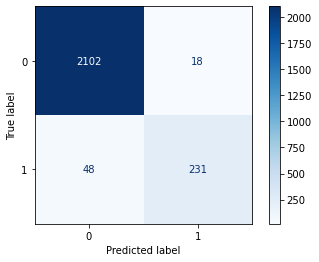

In [15]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')

Out of 2399 test records, 2102+231= 2333 labels are accurately predicted and 48+18=66 labels are inaccurately predicted. 

Now let’s obtain the test accuracy of the classifier. 

In [16]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.972488536890371

For the final evaluation of the classifier let’s use the classification report which asses the model on various parameters, and by observing the score we can conclude the performance of the model.

In [17]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2120
           1       0.93      0.83      0.87       279

    accuracy                           0.97      2399
   macro avg       0.95      0.91      0.93      2399
weighted avg       0.97      0.97      0.97      2399



In the first step, we observed that the distribution of the classes is imbalanced and we thought the prediction would be concentrated on the class label 0. But from the above classification report, we can say that the XGBoost classifier handles the imbalance dataset very well and the classifier is also well evaluated on the above parameters. 

So this is how we can use the XGBoost classifier to address the binary classification problem.